In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from scipy.stats import norm
import scipy.stats as stats
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.core.display import HTML, display


/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
#function to convert time in to time delta from string
def convert_time(s):
    h,m,s = map(int,s.split(':'))
    return pd.Timedelta(hours =h,minutes = m, seconds =s)

In [5]:
m2016 = pd.read_csv('data/2016_full_results.csv',converters={'Time':convert_time})
m2017 = pd.read_csv('data/2017_full_results.csv',converters={'Time':convert_time})
m2018 = pd.read_csv('data/2018_full_results.csv',converters={'Time':convert_time})
m2019 = pd.read_csv('data/2019_full_results.csv',converters={'Time':convert_time})


In [18]:
#concat all marathon
df_four_mar = pd.concat([m2016,m2017,m2018,m2019])

In [427]:
# count of unfinished runners in 2016
m2016[(m2016['Overall']==99999)].count()

Unnamed: 0    890
Overall       890
Bib           890
Name          890
Time          890
Year          890
Distance      890
dtype: int64

In [428]:
#count of unfinished runners in 2017
m2017[(m2017['Overall']==99999)].count()

Unnamed: 0    1185
Overall       1185
Bib           1185
Name          1185
Time          1185
Year          1185
Distance      1185
dtype: int64

In [429]:
#removed from data?
m2018[(m2018['Overall']==99999)].count()

Unnamed: 0    8
Overall       8
Bib           8
Name          8
Time          8
Year          8
Distance      8
dtype: int64

In [430]:
m2019[(m2019['Overall']==99999)].count()

Unnamed: 0    786
Overall       786
Bib           786
Name          786
Time          786
Year          786
Distance      786
dtype: int64

In [79]:
#percentage of runners who did not finish 2016
890/3842*100

23.165018219677254

In [197]:
#percentage of runners who did not finish 2017
1185/3651*100

32.45686113393591

In [224]:
#percentage of runners who did not finish 2018
8/2115*100

0.37825059101654845

In [236]:
# percentage of runners who did not finish in 2019
786/2810*100

27.971530249110323

In [431]:
#drop unfinished runners
m2016 = m2016[:-890]

In [432]:
m2017 = m2017[:-1185]

In [433]:
m2018 = m2018[:-8]

In [434]:
m2019 = m2019[:-786]

In [112]:
#convert to seconds, timedelta64[ns]
m2016['seconds']=m2016['Time'].astype('timedelta64[s]')
m2017['seconds']=m2017['Time'].astype('timedelta64[s]')
m2018['seconds']=m2018['Time'].astype('timedelta64[s]')
m2019['seconds']=m2019['Time'].astype('timedelta64[s]')

In [113]:
#convert to minutes
m2016['minutes']=m2016['seconds']/60
m2017['minutes']=m2017['seconds']/60
m2018['minutes']=m2018['seconds']/60
m2019['minutes']=m2019['seconds']/60

In [114]:
#convert to hours
m2016['hours']=m2016['minutes']/60
m2017['hours']=m2017['minutes']/60
m2018['hours']=m2018['minutes']/60
m2019['hours']=m2019['minutes']/60

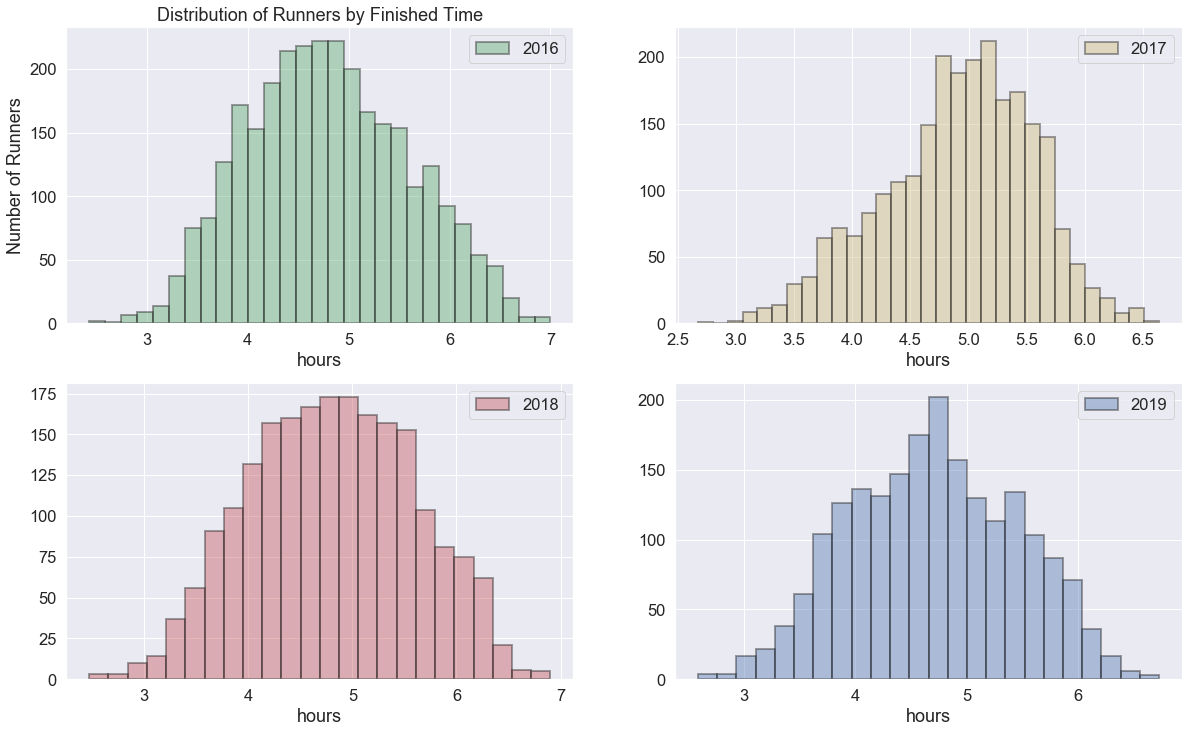

In [675]:
#trying different visuals for time distribution
fig = plt.figure(figsize=(20,12))
sns.set(font_scale=1.5)

plt.subplot(2,2,1)
sns.distplot(m2016['hours'],kde = False,color='g',label='2016',
             hist_kws=dict(edgecolor="k", linewidth=2))
plt.title('Distribution of Runners by Finished Time')
plt.ylabel('Number of Runners')
plt.legend()

plt.subplot(2,2,2)
sns.distplot(m2017['hours'],kde = False,color='y',label='2017',
             hist_kws=dict(edgecolor="k", linewidth=2))
plt.legend()

plt.subplot(2,2,3)
sns.distplot(m2018['hours'],kde = False,color='r',label='2018',
             hist_kws=dict(edgecolor="k", linewidth=2))
plt.legend()

plt.subplot(2,2,4)
sns.distplot(m2019['hours'],kde = False,color='b',label='2019',
             hist_kws=dict(edgecolor="k", linewidth=2));
plt.legend();

In [676]:
#concatenate all results to use in facetgrid visual
mar_all_result=pd.concat([m2016,m2017,m2018,m2019])

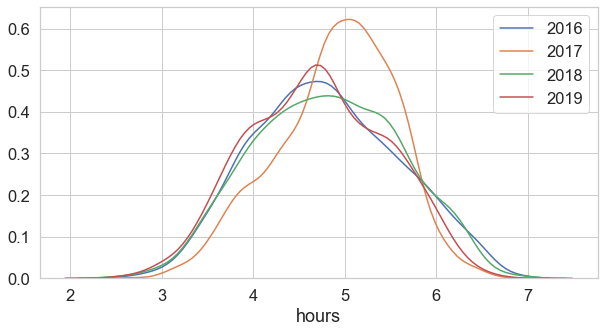

In [677]:
fig = plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.distplot(m2016['hours'],label='2016',hist=False)
sns.distplot(m2017['hours'],label='2017',hist=False)
sns.distplot(m2018['hours'],label='2018',hist=False)           
sns.distplot(m2019['hours'],label='2019',hist=False);
        

In [691]:
# visualize finished and unfinished runners by year
Years=[2016,2017,2019]
Finished=[2952,2466,2024]
Total = [3842,3651,2810]
Not_finished=[890,1175,786]
Percent_Finished=[77,68,72]
Percent_NotFinished=[23,32,28]
complete_runners = pd.DataFrame()

complete_runners['Year'] = Years
complete_runners['Finished']=Finished
complete_runners['Not_Finished']=Not_finished
complete_runners['Percent_Finished'] =Percent_Finished
complete_runners['Percent_NotFinished']=Percent_NotFinished

complete_runners

,Year,Finished,Not_Finished,Percent_Finished,Percent_NotFinished
0,2016,2952,890,77,23
1,2017,2466,1175,68,32
2,2019,2024,786,72,28


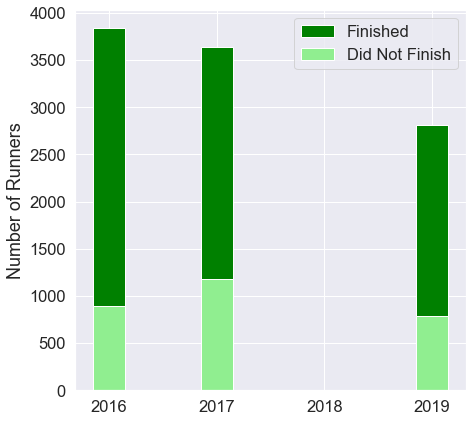

In [692]:
#stacked bar chart of finishers ..
fig = plt.figure(figsize=(7,7))
plt.bar(complete_runners.Year,complete_runners.Finished,width=0.3,color='green',label = 'Finished',bottom=complete_runners.Not_Finished)
plt.bar(complete_runners.Year,complete_runners.Not_Finished, width=0.3,color='lightgreen',label = "Did Not Finish")
plt.legend(loc='best')
plt.ylabel('Number of Runners');


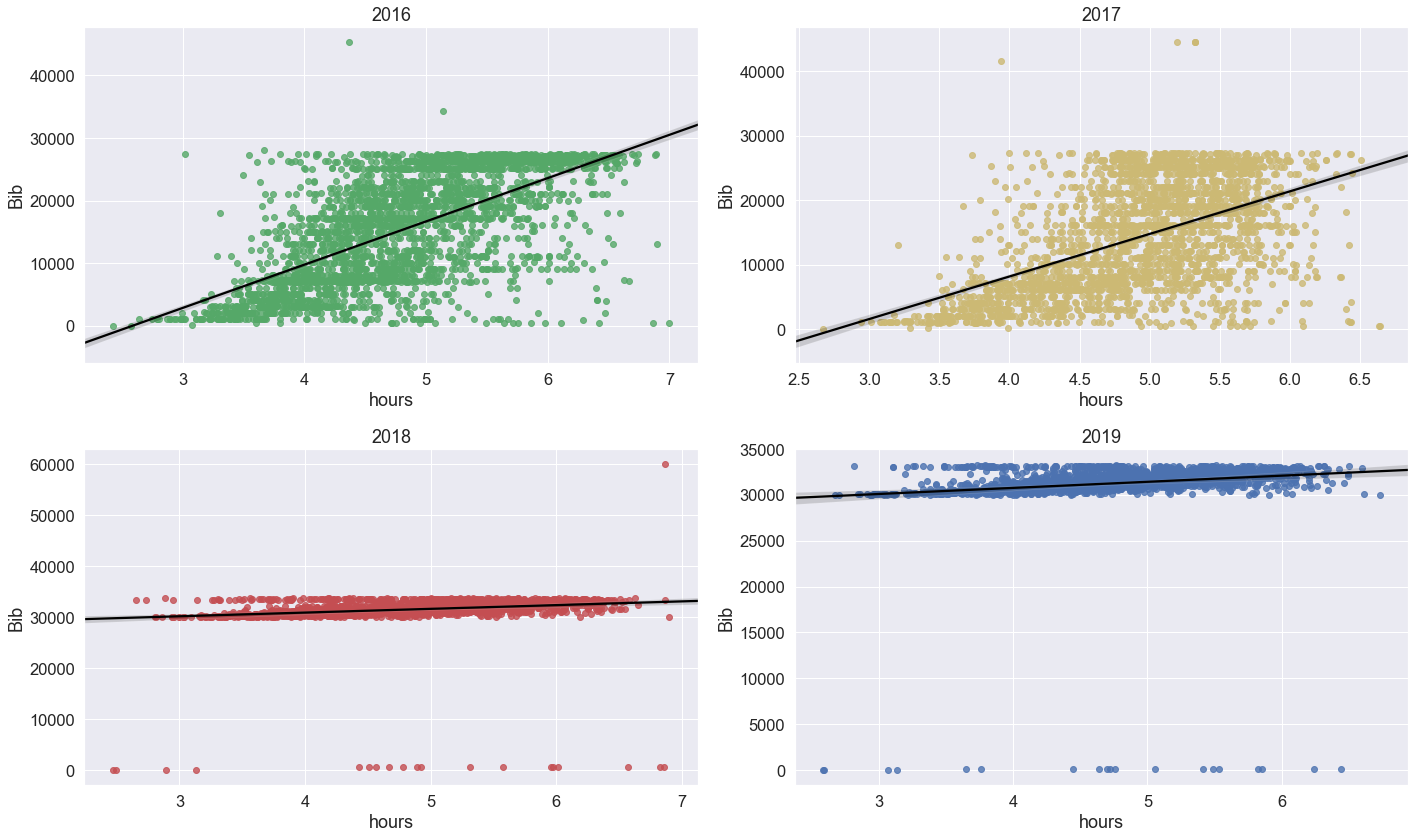

In [680]:
#is there a correlation between bib number and finished time?

fig = plt.figure(figsize=(20,12))
sns.set(font_scale=1.5)

plt.subplot(2,2,1)
sns.regplot(m2016['hours'],m2016['Bib'],color='g',line_kws={'color':'black'},label='2016')
plt.title('2016')

plt.subplot(2,2,2)
sns.regplot(m2017['hours'],m2017['Bib'],color='y',line_kws={'color':'black'},label='2017')
plt.title('2017')

plt.subplot(2,2,3)
sns.regplot(m2018['hours'],m2018['Bib'],color='r',line_kws = {'color':'black'},label='2018')
plt.title('2018')

plt.subplot(2,2,4)
sns.regplot(m2019['hours'],m2019['Bib'],color='b',line_kws={'color':'black'},label='2019')
plt.title('2019')
plt.tight_layout();

In [98]:
#dataframe of low bib runners in 2018
m2018_low_bib = m2018[m2018['Bib']<10000]
m2018_high_bib = m2018[m2018['Bib']>=10000]

In [99]:
#dataframe of low bib runners in 2019
m2019_low_bib = m2019[m2019['Bib']<5000]
m2019_high_bib = m2019[m2019['Bib']>=5000]

In [89]:
#creating dataframe of marathon frequency per runner
multiple_races = df_four_mar.Name.value_counts()
multiple_races = pd.DataFrame(multiple_races)
multiple_races.reset_index()

names=[]
i=0
while i < len(multiple_races['Name']): 
    names.append(multiple_races['Name'].index[i])
    i = i+1
    
run_time=[]
i=0
while i < len(multiple_races['Name']): 
    run_time.append(multiple_races['Name'][i])
    i = i+1    
    
runner_freq= pd.DataFrame()

runner_freq['Name']=names
runner_freq['Runs']=run_time

In [118]:
#inner join on names from df of name and frequency from all 4 marathons , df of low_bib_numbers is 2018,2019
m2018_low_bib_runners = m2018_low_bib.merge(runner_freq,on='Name',how='inner')
m2019_low_bib_runners = m2019_low_bib.merge(runner_freq,on='Name',how='inner')
m2018_high_bib_runners=m2018_high_bib.merge(runner_freq,on='Name',how='inner')
m2019_high_bib_runners=m2019_high_bib.merge(runner_freq,on='Name',how='inner')

average Number of marathons participated comparison using bib numbers.

In [119]:
m2018_low_bib_runners['Runs'].mean()

3.5789473684210527

In [122]:
m2018_high_bib_runners['Runs'].mean()

1.2958015267175573

In [120]:
m2019_low_bib_runners['Runs'].mean()

3.260869565217391

In [123]:
m2019_high_bib_runners['Runs'].mean()

1.2274847506279154

In [165]:
m2018_low_bib_runners['Time'].median()

Timedelta('0 days 04:53:39')

In [166]:
m2018_high_bib_runners['Time'].median()

Timedelta('0 days 04:48:47')

In [167]:
m2019_low_bib_runners['Time'].median()

Timedelta('0 days 04:43:15')

In [168]:
m2019_high_bib_runners['Time'].median()

Timedelta('0 days 04:41:42')

<Figure size 1440x864 with 0 Axes>

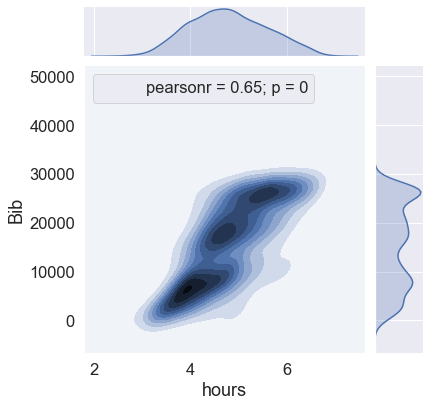

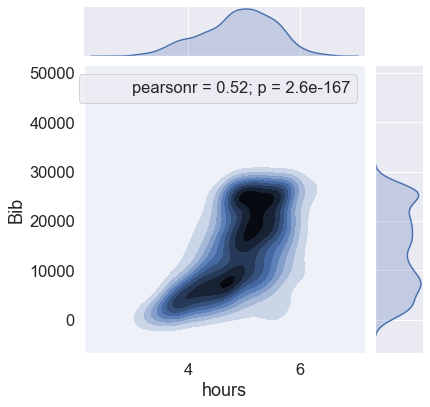

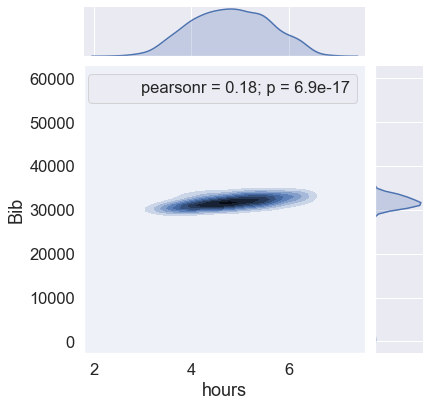

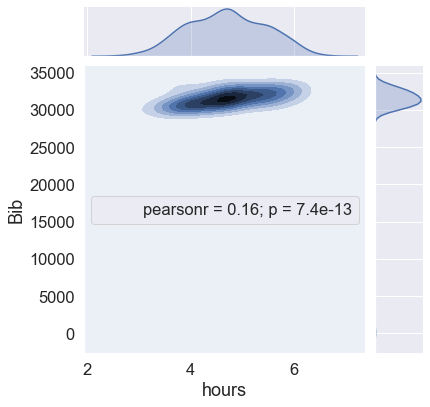

In [710]:
fig = plt.figure(figsize=(20,12))
sns.set(font_scale=1.5)

#plt.subplot(2,1,1)

j=sns.jointplot(x="hours", y="Bib", data=m2016, kind='kde',
                  joint_kws={'color':'green'})
j.annotate(stats.pearsonr,loc='upper left')


#plt.subplot(2,1,2)
k=sns.jointplot(x="hours", y="Bib", data=m2017, kind='kde',
                  joint_kws={'color':'y'})
k.annotate(stats.pearsonr)

#plt.subplot(2,2,3)
k=sns.jointplot(x="hours", y="Bib", data=m2018, kind='kde',
                  joint_kws={'color':'r'})
k.annotate(stats.pearsonr)

#plt.subplot(2,2,4)
k=sns.jointplot(x="hours", y="Bib", data=m2019, kind='kde',
                  joint_kws={'color':'b'})
k.annotate(stats.pearsonr,loc='center');



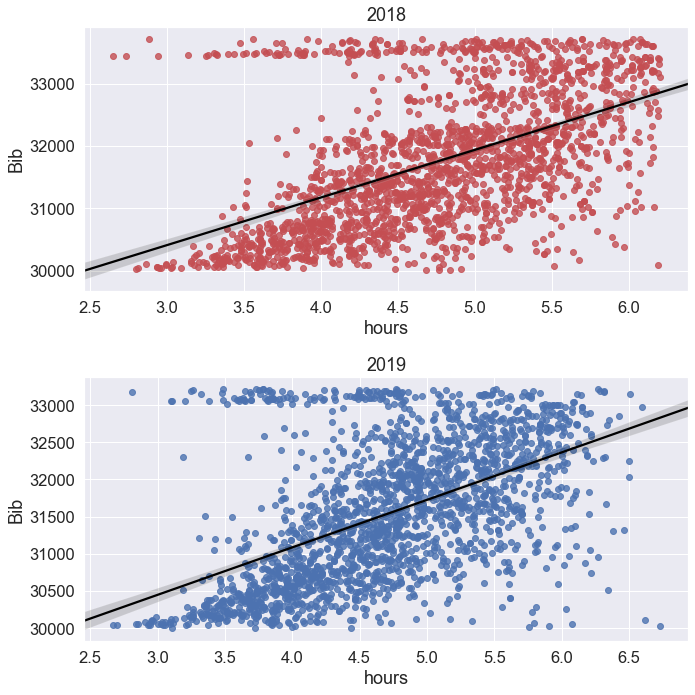

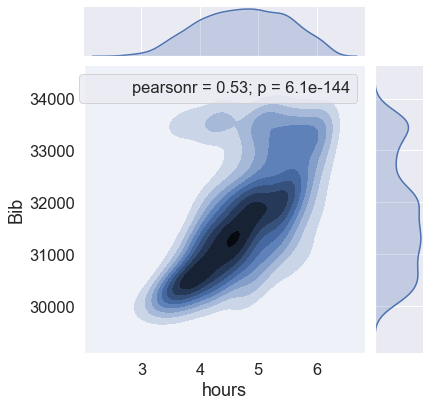

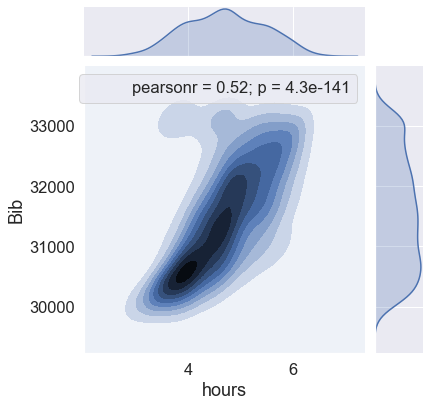

In [711]:
#2018 and 2019 bib number for the general runners between30000 and 35000,
#multiple repeat runners given low bib numbers.

m2019_mass_bib = m2019[(m2019['Bib']>25000)]
m2018_mass_bib = m2018[(m2018['Bib']>25000)& (m2019['Bib']<50000)]

fig = plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)

plt.subplot(2,1,1)
sns.regplot(m2018_mass_bib['hours'],m2018_mass_bib['Bib'],color='r',line_kws = {'color':'black'},label='2018')
plt.title('2018')

plt.subplot(2,1,2)
sns.regplot(m2019_mass_bib['hours'],m2019_mass_bib['Bib'],color='b',line_kws={'color':'black'},label='2019')
plt.title('2019')
plt.tight_layout()

k=sns.jointplot(x="hours", y="Bib", data=m2018_mass_bib, kind='kde',
                  joint_kws={'color':'r'})
k.annotate(stats.pearsonr)

#plt.subplot(2,2,4)
k=sns.jointplot(x="hours", y="Bib", data=m2019_mass_bib, kind='kde',
                  joint_kws={'color':'b'})
k.annotate(stats.pearsonr,loc='best');

In [ ]:
#Bib number distribution may have some sort of method based partially on time. ..i.e.age,gender...

In [683]:
m2016[(m2016['Bib']>30000)]

,Unnamed: 0,Overall,Bib,Name,Time,Year,Distance,seconds,minutes,hours
928,928,931,45340,Stuart Tutler,04:22:14,2016,Full,15734.0,262.233333,4.370556
1975,1975,1980,34311,Mark Alewine,05:08:28,2016,Full,18508.0,308.466667,5.141111


In [684]:
m2017[(m2017['Bib']>40000)]
#can see kellie pickler ...so scraped web for kellie pickler running marathon in 2017.

,Unnamed: 0,Overall,Bib,Name,Time,Year,Distance,seconds,minutes,hours
234,234,235,41685,Angela Montoya,03:56:24,2017,Full,14184.0,236.400000,3.940000
1585,1585,1586,44559,Kellie Pickler,05:11:43,2017,Full,18703.0,311.716667,5.195278
1773,1773,1774,44561,Allison Baker,05:19:15,2017,Full,19155.0,319.250000,5.320833
1776,1776,1777,44560,Kyle Jacobs,05:19:26,2017,Full,19166.0,319.433333,5.323889
1777,1777,1778,44562,Ken Johnson,05:19:27,2017,Full,19167.0,319.450000,5.324167


In [797]:
website_url = 'http://www.zimbio.com/photos/Kellie+Pickler/Kyle+Jacobs/St+Jude+Rock+n+Roll+Nashville+Marathon+1+2/LuaaO8mkkpZ'
result = requests.get(website_url)
soup = BeautifulSoup(result.content)


images = soup.find_all('img')
display(HTML(str(images[2])))

conclusion: special Bib numbers given to celebrity team

synopsis of kellie pickler reality show : Kellie is invited to build a team of runners for a fundraising marathon for St. Jude Children's Research Hospital and hopes to build the squad from her closest friends.

In [686]:
#only participant with bib number in 60000, 
m2018[(m2018['Bib'])>60000]
#Unknown names ->malfunction of tracker chip, bib tag

,Unnamed: 0,Overall,Bib,Name,Time,Year,Distance,seconds,minutes,hours
2104,2104,2105,60042,Contact Sportstats,06:51:55,2018,Full,24715.0,411.916667,6.865278


In [ ]:
#import csv with gender column

In [108]:
gender16=pd.read_csv('data/2016_full_results_with_gender.csv',converters={'Time':convert_time})
gender17=pd.read_csv('data/2017_full_results_with_gender.csv',converters={'Time':convert_time})
gender18=pd.read_csv('data/2018_full_results_with_gender.csv',converters={'Time':convert_time})
gender19=pd.read_csv('data/2019_full_results_with_gender.csv',converters={'Time':convert_time})

gender16['seconds']=gender16['Time'].astype('timedelta64[s]')
gender17['seconds']=gender17['Time'].astype('timedelta64[s]')
gender18['seconds']=gender18['Time'].astype('timedelta64[s]')
gender19['seconds']=gender19['Time'].astype('timedelta64[s]')

#convert to minutes
gender16['minutes']=gender16['seconds']/60
gender17['minutes']=gender17['seconds']/60
gender18['minutes']=gender18['seconds']/60
gender19['minutes']=gender19['seconds']/60

#convert to hours
gender16['hours']=gender16['minutes']/60
gender17['hours']=gender17['minutes']/60
gender18['hours']=gender18['minutes']/60
gender19['hours']=gender19['minutes']/60



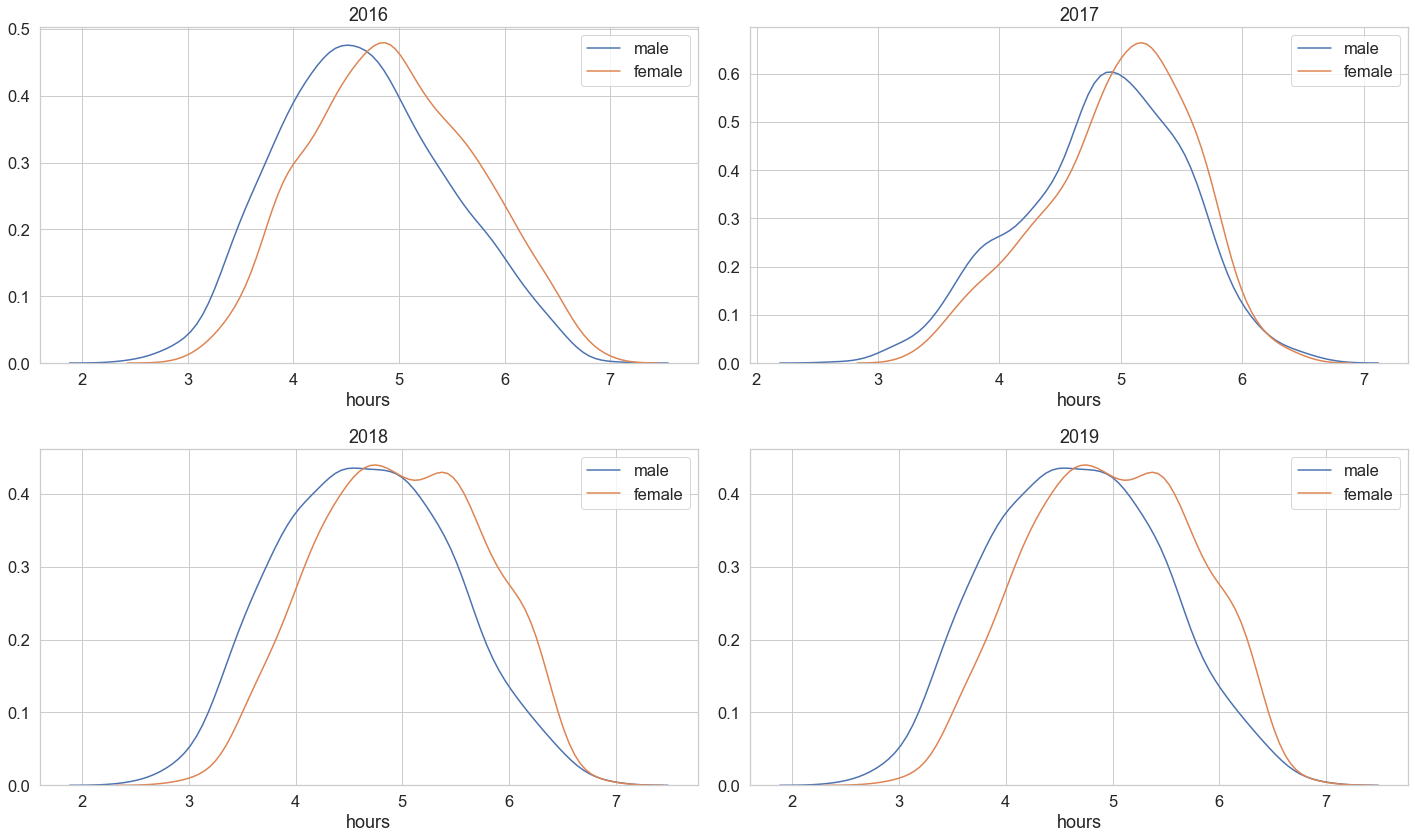

In [58]:
#distribution of runners classified by gender
male16 = gender16[gender16['Gender']=='male']
female16 = gender16[gender16['Gender']=='female']

male17 = gender17[gender17['Gender']=='male']
female17 = gender17[gender17['Gender']=='female']

male18 = gender18[gender18['Gender']=='male']
female18 = gender18[gender18['Gender']=='female']

male19 = gender19[gender19['Gender']=='male']
female19 = gender19[gender19['Gender']=='female']

fig = plt.figure(figsize=(20,12))
sns.set(font_scale=1.5)

sns.set_style('whitegrid')
plt.subplot(2,2,1)
sns.distplot(male16['hours'],label='male',hist=False)
sns.distplot(female16['hours'],label='female',hist=False)
plt.title('2016')

plt.subplot(2,2,2)
sns.set_style('whitegrid')
sns.distplot(male17['hours'],label='male',hist=False)
sns.distplot(female17['hours'],label='female',hist=False)
plt.title('2017')

plt.subplot(2,2,3)
sns.set_style('whitegrid')
sns.distplot(male18['hours'],label='male',hist=False)
sns.distplot(female18['hours'],label='female',hist=False)
plt.title('2018')

plt.subplot(2,2,4)
sns.set_style('whitegrid')
sns.distplot(male18['hours'],label='male',hist=False)
sns.distplot(female18['hours'],label='female',hist=False)
plt.title('2019')
plt.tight_layout();

In [50]:
male16['Time'].median()

Timedelta('0 days 04:37:02')

In [51]:
female16['Time'].median()

Timedelta('0 days 04:55:14.500000')

In [52]:
male17['Time'].median()

Timedelta('0 days 04:53:19')

In [53]:
female17['Time'].median()

Timedelta('0 days 05:02:39')

In [54]:
male18['Time'].median()

Timedelta('0 days 04:39:18')

In [55]:
female18['Time'].median()

Timedelta('0 days 04:59:27')

In [56]:
male19['Time'].median()

Timedelta('0 days 04:35:45')

In [57]:
female19['Time'].median()

Timedelta('0 days 04:50:35.500000')